## Import packages

In [10]:
import tensorflow as tf
import keras

import numpy as np
import matplotlib.pyplot as plt

## Utils

In [11]:
def plot_image(
    image: np.ndarray,
    y_true: np.ndarray,
    y_pred: np.ndarray = None,
    shape: tuple[int, int] = (2, 4),  # rows, cols
) -> None:
    random_index = np.random.randint(0, image.shape[0], shape[0] * shape[1])
    _, axes = plt.subplots(shape[0], shape[1], figsize=(10, 5))
    for i, ax in enumerate(axes.flat):
        color = "green" if y_true[random_index[i]] == y_pred[random_index[i]] else "red"
        ax.imshow(image[random_index[i]], cmap="gray")
        ax.axis("off")
        ax.set_title(f"True: {y_true[random_index[i]]}", color=color)
        if y_pred is not None:
            ax.set_title(
                f"True: {y_true[random_index[i]]}, Pred: {y_pred[random_index[i]]}"
            )

    plt.tight_layout()
    plt.show()

## Import dataset

In [12]:
mnist = keras.datasets.mnist.load_data()

In [13]:
(X_train, y_train), (X_test, y_test) = mnist

### Normalize data

In [14]:
X_train, X_test = X_train / 255.0, X_test / 255.0

## Train model

In [15]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(28, 28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

In [16]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5


2024-07-04 06:11:15.865963: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8602 - loss: 0.4747
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9558 - loss: 0.1514
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9659 - loss: 0.1111
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9722 - loss: 0.0897
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9780 - loss: 0.0709


In [19]:
predictions = model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


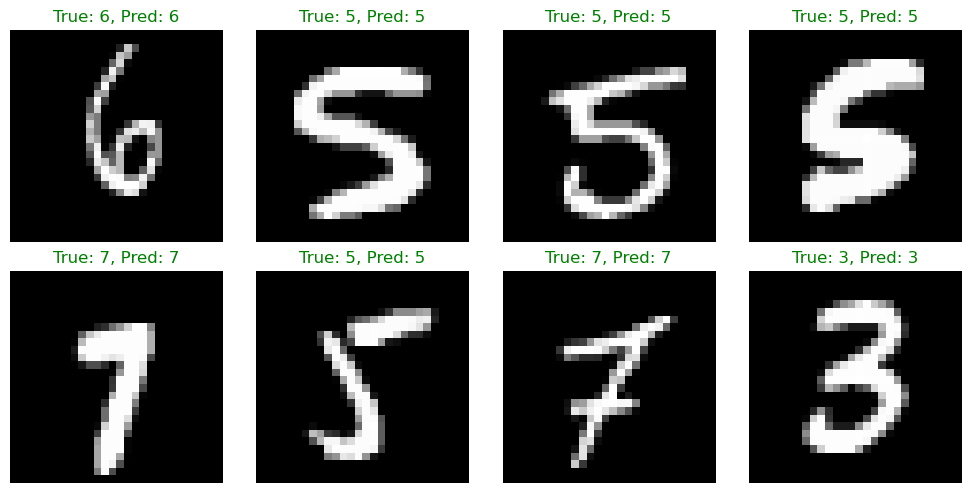

In [20]:
plot_image(X_test, y_test, predictions)

In [21]:
model.save("mnist_model.keras")